In [34]:

#importamos librerias necesarias para nuestro analisis 

from utils import *

events_clean_1 = pd.read_csv("data_limpia_disparos_1.csv")
events_clean_1

,Unnamed: 0,time,event_type,side,event_team,opponent,player,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
0,0,2,Attempt,Away,Hamburg SV,Borussia Dortmund,mladen petric,High and wide,Off target,0,Left side of the box,left foot,Pass,Open play
1,11,14,Attempt,Home,Borussia Dortmund,Hamburg SV,shinji kagawa,Top right corner,Off target,0,Outside the box,right foot,Pass,Open play
2,13,17,Attempt,Home,Borussia Dortmund,Hamburg SV,kevin grosskreutz,Bottom right corner,On target,1,Left side of the box,left foot,Pass,Open play
3,14,19,Attempt,Home,Borussia Dortmund,Hamburg SV,mats hummels,Blocked,Blocked,0,Outside the box,right foot,None,Open play
4,17,20,Attempt,Away,Hamburg SV,Borussia Dortmund,tomas rincon,Blocked,Blocked,0,Outside the box,right foot,None,Open play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227446,940983,81,Attempt,Home,Atalanta,Sampdoria,remo freuler,Blocked,Blocked,0,Outside the box,right foot,None,Open play
227447,940991,84,Attempt,Home,Atalanta,Sampdoria,alberto grassi,Too high,Off target,0,Outside the box,right foot,Pass,Open play
227448,940992,86,Attempt,Home,Atalanta,Sampdoria,alejandro gomez,Centre of the goal,On target,0,Left side of the box,right foot,Pass,Open play
227449,940993,87,Attempt,Away,Sampdoria,Atalanta,fabio quagliarella,Centre of the goal,On target,0,Outside the box,right foot,Pass,Open play


<br>

<br>
<br>


## Análisis Univariado

<br><br>
### intentos de tiros al arco
<br><br>

In [35]:
intentos_de_tiros = events_clean_1['shot_place'].value_counts()
intentos_de_tiros

Blocked                   54081
Misses to the left        27024
Misses to the right       25213
Centre of the goal        25079
Bottom right corner       18748
Bottom left corner        18260
High and wide             15910
Too high                  15793
Top right corner           6306
Bit too high               6077
Top left corner            5983
Top centre of the goal     5402
Hits the bar               3575
Name: shot_place, dtype: int64

<br><br><br>

In [36]:
# Agrupamos los resultados de los intentos de tiros al arco  y sus resultados
intentos_de_tiros = events_clean_1['shot_place'].value_counts()
bar1 = px.bar(intentos_de_tiros, color_discrete_sequence=px.colors.sequential.Plasma,title= "Intentos de tiros al arco")

bar1.update_layout(title_x=0.5, title_font_size=30)


<br><br>
### Lugar desde donde se ejecuto el tiro al arco
<br><br>

In [37]:
#Analizamos y agrupamos el lugar desde donde se ejecuto cada tiro al arco
lugar_de_ejecicion  = events_clean_1['location'].value_counts()
bar2= px.bar(lugar_de_ejecicion, color_discrete_sequence=px.colors.sequential.Plasma,
             title= "Posicion de remates al arco"
      )
bar2.update_layout(title_x=0.5, title_font_size=30) 

<br><br>
### Resultados de tiros al arco
<br><br>

In [38]:
# Agrupamos los resultados de los tiros, vemos que variable "Hit the bar" es menos usual que las demas, 
# ya que un disparo a los postes es menos frecuente que ocurra.
resultado_de_tiros = events_clean_1['shot_outcome'].value_counts()
bar3 = px.bar(resultado_de_tiros, color_discrete_sequence=px.colors.sequential.Plasma,
  title="Resultados de tiros al arco"    )
bar3.update_layout(title_x=0.5, title_font_size=30) 


<br><br>
### Efectividad de remates al arco
<br><br>

In [39]:
#Agupamos la variable "is_goal" para identificar que porcentaje terminó o no en gol.
#Se observa como solo un 10.01% de los intentos termina en gol.
tiros_goals = events_clean_1['is_goal'].value_counts()
fig = px.pie(values=tiros_goals.values, 
             names=tiros_goals.index,
             color_discrete_sequence=px.colors.sequential.Mint)
fig.update_traces(textposition='inside',
                  textfont_size=15)
fig.update_layout(title_text="Remates que fueron o no goles",
                  uniformtext_minsize=10, 
                  uniformtext_mode='hide')

fig.update_layout(title_x=0.5, title_font_size=20) 
fig.data[0].labels= np.array( ["No fue gol", "Fue gol"])
fig.show()

<br><br>
<br><br>
###  situation en la que se genera un remate al arco
<br><br>

In [40]:

#Se analiza la columna "situation" para ver como se genero esa ocasión de gol. 
situacion_de_jugada = events_clean_1.groupby(["situation"]).size()
situacion_de_jugada
#Es claro que la mayoría de estas ocasiones viene de jugadas de juego continuas.


situation
Corner        18046
Free kick      5408
Open play    192430
Set piece     11567
dtype: int64

In [41]:
#Se analiza la columna "situation" para ver como se genero esa ocasión de gol. 
#Es claro que la mayoría de estas ocasiones viene de jugadas de juego continuas.
tipo_de_jugada = events_clean_1['situation'].value_counts()
bar4 = px.bar(tipo_de_jugada, color_discrete_sequence=px.colors.sequential.Plasma, title="Tipo de ocasiones de gol", 
    )
bar4.update_layout(title_x=0.5, title_font_size=30) 

<br><br>
<br><br>
### Ocasiones de gol durante los distintos minutos del partido
<br><br>

In [42]:

#Se agrupan los eventos según el ,inuto de partido en el que sucedieron.
tiros_en_el_tiempo =  events_clean_1.groupby(["time"]).size()
tiros_en_el_tiempo


time
0        35
1      1097
2      1760
3      1920
4      2053
       ... 
96       48
97       15
98        5
99        3
100       1
Length: 101, dtype: int64

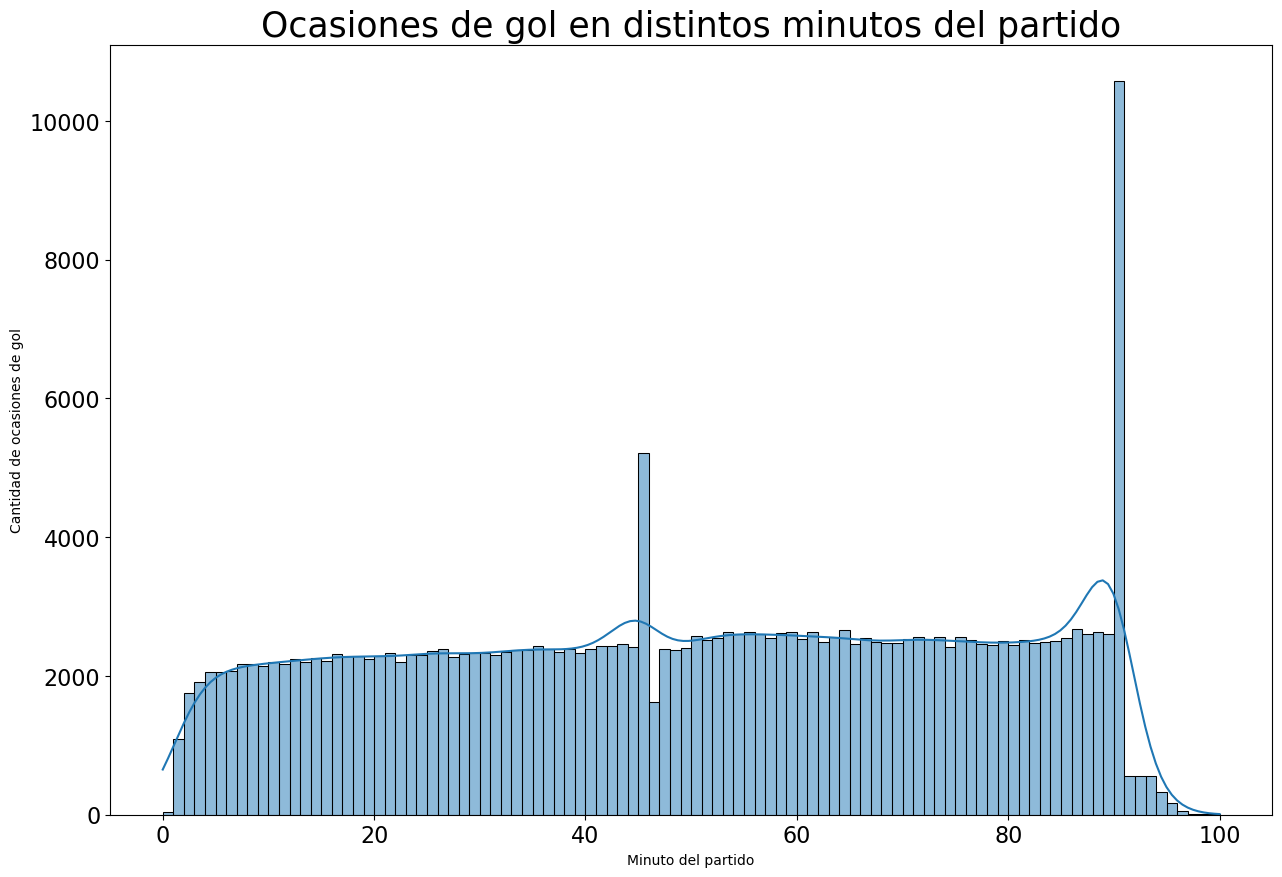

In [43]:

plt.figure(figsize=(15,10))
sns.histplot(events_clean_1["time"],kde=True, bins=100,)
plt.xlabel ("Minuto del partido")
plt.ylabel ("Cantidad de ocasiones de gol")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Ocasiones de gol en distintos minutos del partido", fontsize= 25)


plt.show()

#En este gráfico se observa con claridad que la mayor concentración de ocasiones de gol se da durante los minutos finales.
#Tanto en los finales del primer tiempo (min 45) y en mayor medida cerca del final del partido (min 90)

<br>

## Análisis Bivariado y Multivariado

#### A continuacion realizaremos un analisis bivariado entre las columnas que son de nuestro interes 


Columnas importantes:

(shot_place = lugar donde termino el tiro) 

(Location = lugar donde se efectuó el tiro)

(shot_outcome = resultado del tiro) 

(is_goal = si fue o no un gol)

(side =  equipo que efectuó la jugada (local o visitante)) 

(bodypart = parte del cuerpo con la que realizó la definición de la jugada)

(assist_method = tipo de asistencia)

(situation = tipo de situacion de la jugada) 

(time = tiempo de las acciones en el partido)

#### Primero analizaremos  algunas de las variables relevantes junto a la variable "is_goal"

<br><br>
### Efectividad según la posicion tiro al arco
<br><br>


In [44]:
df_location_vs_isgoal = events_clean_1.groupby(["location","is_goal"]).size()
df_location_vs_isgoal

location                        is_goal
Centre of the box               0          58893
                                1          10269
Difficult angle and long range  0           1474
                                1             39
Difficult angle on the left     0           2362
                                1            193
Difficult angle on the right    0           2271
                                1            176
Left side of the box            0          17799
                                1           1201
Left side of the six yard box   0           2781
                                1            678
Long range                      0           1960
                                1             28
More than 35 yards              0           1955
                                1             22
More than 40 yards              0            252
                                1              3
Not recorded                    1            775
Outside the box              

In [45]:
df_location_vs_isgoal1 = pd.DataFrame(df_location_vs_isgoal)
df_location_vs_isgoal1

0
location                       is_goal       
Centre of the box              0        58893
                               1        10269
Difficult angle and long range 0         1474
                               1           39
Difficult angle on the left    0         2362
                               1          193
Difficult angle on the right   0         2271
                               1          176
Left side of the box           0        17799
                               1         1201
Left side of the six yard box  0         2781
                               1          678
Long range                     0         1960
                               1           28
More than 35 yards             0         1955
                               1           22
More than 40 yards             0          252
                               1            3
Not recorded                   1          775
Outside the box                0        91111
                               1         2498
Penalty spot                   0          607
                               1         1899
Right side of the box          0        17168
                               1         1228
Right side of the six yard box 0         2724
                               1          664
Very close range               0         3324
                               1         3097

In [46]:
df_location_vs_isgoal_final = pd.pivot_table(df_location_vs_isgoal1, columns="is_goal", index="location", values= 0)
df_location_vs_isgoal_final

is_goal,0,1
location,,
Centre of the box,58893.0,10269.0
Difficult angle and long range,1474.0,39.0
Difficult angle on the left,2362.0,193.0
Difficult angle on the right,2271.0,176.0
Left side of the box,17799.0,1201.0
Left side of the six yard box,2781.0,678.0
Long range,1960.0,28.0
More than 35 yards,1955.0,22.0
More than 40 yards,252.0,3.0


In [47]:

bar5 = px.bar(df_location_vs_isgoal_final, color_discrete_sequence=px.colors.sequential.Hot
 ,title="Efectividad según el lugar de Ejecución del disparo",     )
bar5.update_layout(title_x=0.5, title_font_size=25) 


#### A partir de esta grafica podemos ver cuales son las zonas desde las que es más probale que la jugada termine en gol.


<br><br><br><br>

### Tiros que termiaron en gol según con la parte del cuerpo que se realizó el remate.

In [48]:

#Se realiza un groupby para obtener la agrupación de los tiros que termiaron en gol- 
#según con la parte del cuerpo que se realizó el remate.
bodypart_vs_goal = pd.DataFrame(events_clean_1.groupby(["is_goal" , "bodypart"]).size())
bodypart_vs_goal



0
is_goal bodypart          
0       head         31720
        left foot    64520
        right foot  108441
1       head          3977
        left foot     6517
        right foot   12276

In [49]:

bodypart_vs_goal1 = pd.pivot_table(bodypart_vs_goal, columns="is_goal", index="bodypart", values = 0)
bodypart_vs_goal1


is_goal,0,1
bodypart,,
head,31720,3977
left foot,64520,6517
right foot,108441,12276


In [50]:
bar6 = px.bar(bodypart_vs_goal1, color_discrete_sequence=px.colors.sequential.Hot
 ,title="Efectividad de remates a gol según con que parte ser remató"     )
bar6.update_layout(title_x=0.5, title_font_size=20) 


#### Se puede observar en el gráfico que claramente hay una mayor cantidad de remates con pierna derecha, por lo tanto hay más goles anotados con remates de derecha de que cabeza o izquierda.

#### Pero en proporción, se anota en un mayor porcentaje cuando el remate es de cabeza (11.14%) que cuando es de derecha (10.16%) o de izquierda (9.17%).
<br><br><br>

### Analizamos los tiros que termiaron en gol segúnel tipo de asistencia que recibió el rematador.

In [51]:


#Se realiza un groupby para obtener la agrupación de los tiros que termiaron en gol- 
#según el tipo de asistencia que recibió el rematador.
assist_vs_goal = pd.DataFrame(events_clean_1.groupby(["is_goal" , "assist_method"]).size())
assist_vs_goal 


0
is_goal assist_method        
0       Cross           38130
        Headed pass      6869
        None            53387
        Pass           100843
        Through ball     5452
1       Cross            4848
        Headed pass       790
        None             6923
        Pass             8348
        Through ball     1861

In [52]:

assist_vs_goal1 = pd.pivot_table(assist_vs_goal, columns="is_goal", index="assist_method", values = 0)
assist_vs_goal1


is_goal,0,1
assist_method,,
Cross,38130,4848
Headed pass,6869,790
None,53387,6923
Pass,100843,8348
Through ball,5452,1861


In [53]:

bar7 = px.bar(assist_vs_goal1, color_discrete_sequence=px.colors.sequential.Hot
 ,title="Efectividad de remates a gol según el tipo de asistencia"     )
bar7.update_layout(title_x=0.5, title_font_size=20) 

#### En la gráfica resulta bastante claro como cuando se realiza un pase filtrado (Through ball), es más factible que la jugada termine en gol. <br> Por el contrario, cuando se se da pase con la cabeza (Headed ball), resulta más complicado que la jugada termine en gol.
<br><br><br>

### Analizamos según la localía, que situaciones terminaron o no en gol.

In [54]:

#Aplicamos un groupby con las 3 variables a analizar.
localia_gol_situacion = events_clean_1.groupby(["side","is_goal","situation"]).size()
localia_gol_situacion


side  is_goal  situation
Away  0        Corner        6573
               Free kick     2136
               Open play    79256
               Set piece     3570
      1        Corner        1019
               Free kick      309
               Open play     6989
               Set piece     1389
Home  0        Corner        8927
               Free kick     2549
               Open play    97170
               Set piece     4500
      1        Corner        1527
               Free kick      414
               Open play     9015
               Set piece     2108
dtype: int64

In [55]:

#Lo convertimos en un dataframe con el método "reset_index"
localia_gol_situacion1 = localia_gol_situacion.reset_index()
localia_gol_situacion1


,side,is_goal,situation,0
0,Away,0,Corner,6573
1,Away,0,Free kick,2136
2,Away,0,Open play,79256
3,Away,0,Set piece,3570
4,Away,1,Corner,1019
5,Away,1,Free kick,309
6,Away,1,Open play,6989
7,Away,1,Set piece,1389
8,Home,0,Corner,8927
9,Home,0,Free kick,2549


In [56]:

#Le aplicamos el método "pivot" para acomodar la tabla de tal manera que se pueda graficar.
localia_gol_situacion2 = pd.pivot_table(localia_gol_situacion1 ,columns =["is_goal", "side"], index="situation", values = 0)
localia_gol_situacion2


is_goal        0            1      
side        Away   Home  Away  Home
situation                          
Corner      6573   8927  1019  1527
Free kick   2136   2549   309   414
Open play  79256  97170  6989  9015
Set piece   3570   4500  1389  2108

<function matplotlib.pyplot.show(close=None, block=None)>

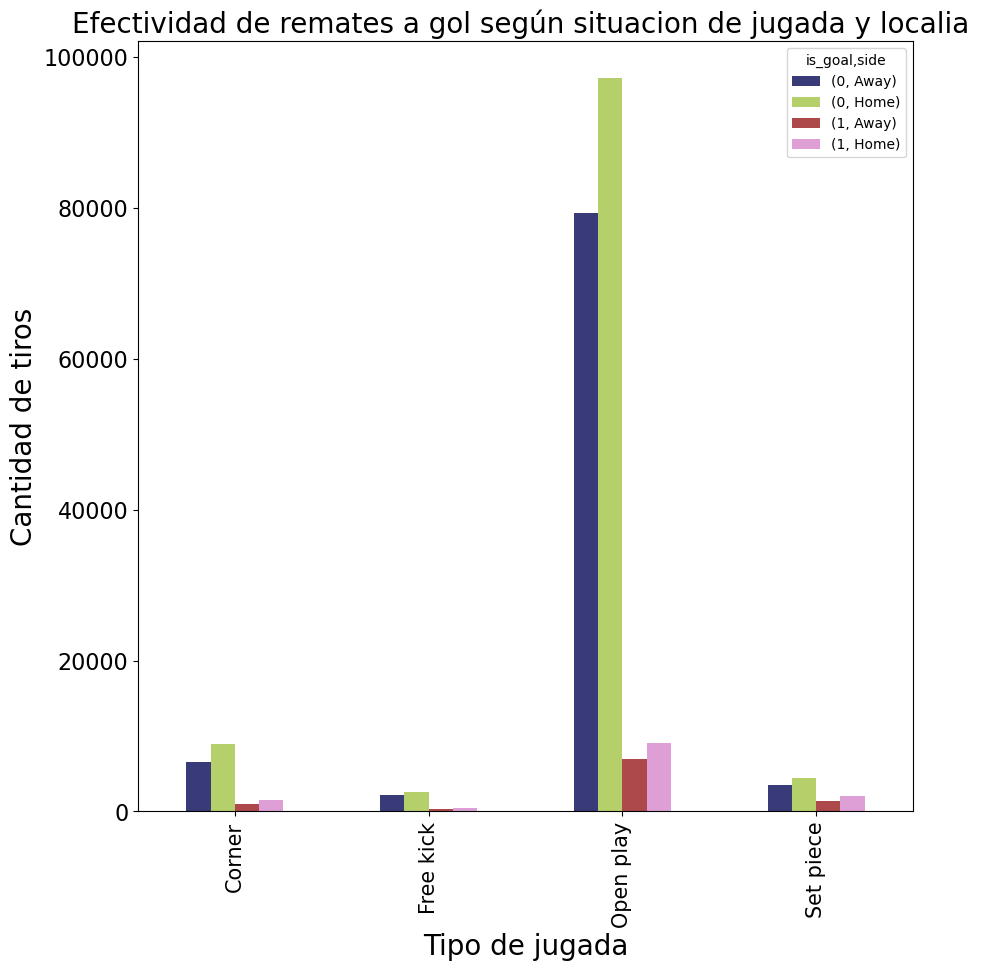

In [57]:

# Realizamos la grafica 
localia_gol_situacion2.plot(kind="bar",
            figsize = (10,10), colormap='tab20b')

plt.xlabel ("Tipo de jugada", fontsize=20)
plt.ylabel ("Cantidad de tiros", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=16)
plt.title("Efectividad de remates a gol según situacion de jugada y localia ", fontsize= 20)
plt.show

<br><br>


#### En la gráfica de barras podemos apreciar como hay una mayor concentración de ocasiones de gol por parte de los equipos que juegan como local (barras naranja y roja). Y también es claro que la mayor cantidad de ocaciones de gol se dan en jugadas normales de juego y no en las distintas situaciones a balón parado.


#### Por otro lado, la jugadas de táctica fija (Set piece) son las más efectivas para que la jugada termine en anotación, tanto para los locales (31.90%) como para los visitantes (28%).

<br><br><br>
### Analizamos las ocasiones que terminaron en gol según el tipo de asistencia y la ubicación desde donde se remató.


In [58]:

#Aplicamos un groupby con las 3 variables a analizar.
location_assist_isgoal = events_clean_1.groupby(["location","is_goal","assist_method"]).size()
location_assist_isgoal


location           is_goal  assist_method
Centre of the box  0        Cross            28489
                            Headed pass       2267
                            None              8490
                            Pass             17458
                            Through ball      2189
                                             ...  
Very close range   1        Cross              993
                            Headed pass        213
                            None               970
                            Pass               891
                            Through ball        30
Length: 121, dtype: int64

In [59]:

#Lo convertimos en un dataframe con el método "reset_index"
location_assist_isgoal = location_assist_isgoal.reset_index()
location_assist_isgoal


,location,is_goal,assist_method,0
0,Centre of the box,0,Cross,28489
1,Centre of the box,0,Headed pass,2267
2,Centre of the box,0,None,8490
3,Centre of the box,0,Pass,17458
4,Centre of the box,0,Through ball,2189
...,...,...,...,...
116,Very close range,1,Cross,993
117,Very close range,1,Headed pass,213
118,Very close range,1,None,970
119,Very close range,1,Pass,891


In [60]:

#Le aplicamos el método "pivot" para acomodar la tabla de tal manera que se pueda graficar.
location_assist_isgoal1 = pd.pivot_table(location_assist_isgoal ,columns =["assist_method", "is_goal"], index="location", values = 0)
location_assist_isgoal1


assist_method                     Cross         Headed pass            None  \
is_goal                               0       1           0      1        0   
location                                                                      
Centre of the box               28489.0  3172.0      2267.0  353.0   8490.0   
Difficult angle and long range     18.0     NaN        35.0    1.0    849.0   
Difficult angle on the left       449.0    22.0        82.0    5.0    435.0   
Difficult angle on the right      450.0    15.0        76.0    4.0    450.0   
Left side of the box             1610.0    48.0       561.0   31.0   3200.0   
Left side of the six yard box    1454.0   264.0       137.0   37.0    543.0   
Long range                          3.0     NaN        45.0    NaN    751.0   
More than 35 yards                  2.0     NaN        70.0    1.0    893.0   
More than 40 yards                  NaN     NaN        12.0    1.0    120.0   
Not recorded                        NaN     NaN         NaN    NaN      NaN   
Outside the box                   883.0    16.0      2592.0   79.0  32787.0   
Penalty spot                        NaN     NaN         NaN    NaN    607.0   
Right side of the box            1539.0    55.0       559.0   32.0   3144.0   
Right side of the six yard box   1479.0   263.0       124.0   33.0    519.0   
Very close range                 1754.0   993.0       309.0  213.0    599.0   

assist_method                              Pass         Through ball          
is_goal                              1        0       1            0       1  
location                                                                      
Centre of the box               1830.0  17458.0  3824.0       2189.0  1090.0  
Difficult angle and long range    13.0    567.0    24.0          5.0     1.0  
Difficult angle on the left       34.0   1152.0    90.0        244.0    42.0  
Difficult angle on the right      38.0   1060.0    73.0        235.0    46.0  
Left side of the box             183.0  11296.0   701.0       1132.0   238.0  
Left side of the six yard box    182.0    587.0   161.0         60.0    34.0  
Long range                         5.0   1159.0    23.0          2.0     NaN  
More than 35 yards                10.0    990.0    11.0          NaN     NaN  
More than 40 yards                 NaN    120.0     2.0          NaN     NaN  
Not recorded                     775.0      NaN     NaN          NaN     NaN  
Outside the box                  626.0  54515.0  1671.0        334.0   106.0  
Penalty spot                    1899.0      NaN     NaN          NaN     NaN  
Right side of the box            181.0  10759.0   724.0       1167.0   236.0  
Right side of the six yard box   177.0    534.0   153.0         68.0    38.0  
Very close range                 970.0    646.0   891.0         16.0    30.0

In [61]:

#Se reemplazan los valores nulos por "0"
location_assist_isgoal2 = location_assist_isgoal1.replace(np.nan, 0)
location_assist_isgoal2


assist_method                     Cross         Headed pass            None  \
is_goal                               0       1           0      1        0   
location                                                                      
Centre of the box               28489.0  3172.0      2267.0  353.0   8490.0   
Difficult angle and long range     18.0     0.0        35.0    1.0    849.0   
Difficult angle on the left       449.0    22.0        82.0    5.0    435.0   
Difficult angle on the right      450.0    15.0        76.0    4.0    450.0   
Left side of the box             1610.0    48.0       561.0   31.0   3200.0   
Left side of the six yard box    1454.0   264.0       137.0   37.0    543.0   
Long range                          3.0     0.0        45.0    0.0    751.0   
More than 35 yards                  2.0     0.0        70.0    1.0    893.0   
More than 40 yards                  0.0     0.0        12.0    1.0    120.0   
Not recorded                        0.0     0.0         0.0    0.0      0.0   
Outside the box                   883.0    16.0      2592.0   79.0  32787.0   
Penalty spot                        0.0     0.0         0.0    0.0    607.0   
Right side of the box            1539.0    55.0       559.0   32.0   3144.0   
Right side of the six yard box   1479.0   263.0       124.0   33.0    519.0   
Very close range                 1754.0   993.0       309.0  213.0    599.0   

assist_method                              Pass         Through ball          
is_goal                              1        0       1            0       1  
location                                                                      
Centre of the box               1830.0  17458.0  3824.0       2189.0  1090.0  
Difficult angle and long range    13.0    567.0    24.0          5.0     1.0  
Difficult angle on the left       34.0   1152.0    90.0        244.0    42.0  
Difficult angle on the right      38.0   1060.0    73.0        235.0    46.0  
Left side of the box             183.0  11296.0   701.0       1132.0   238.0  
Left side of the six yard box    182.0    587.0   161.0         60.0    34.0  
Long range                         5.0   1159.0    23.0          2.0     0.0  
More than 35 yards                10.0    990.0    11.0          0.0     0.0  
More than 40 yards                 0.0    120.0     2.0          0.0     0.0  
Not recorded                     775.0      0.0     0.0          0.0     0.0  
Outside the box                  626.0  54515.0  1671.0        334.0   106.0  
Penalty spot                    1899.0      0.0     0.0          0.0     0.0  
Right side of the box            181.0  10759.0   724.0       1167.0   236.0  
Right side of the six yard box   177.0    534.0   153.0         68.0    38.0  
Very close range                 970.0    646.0   891.0         16.0    30.0

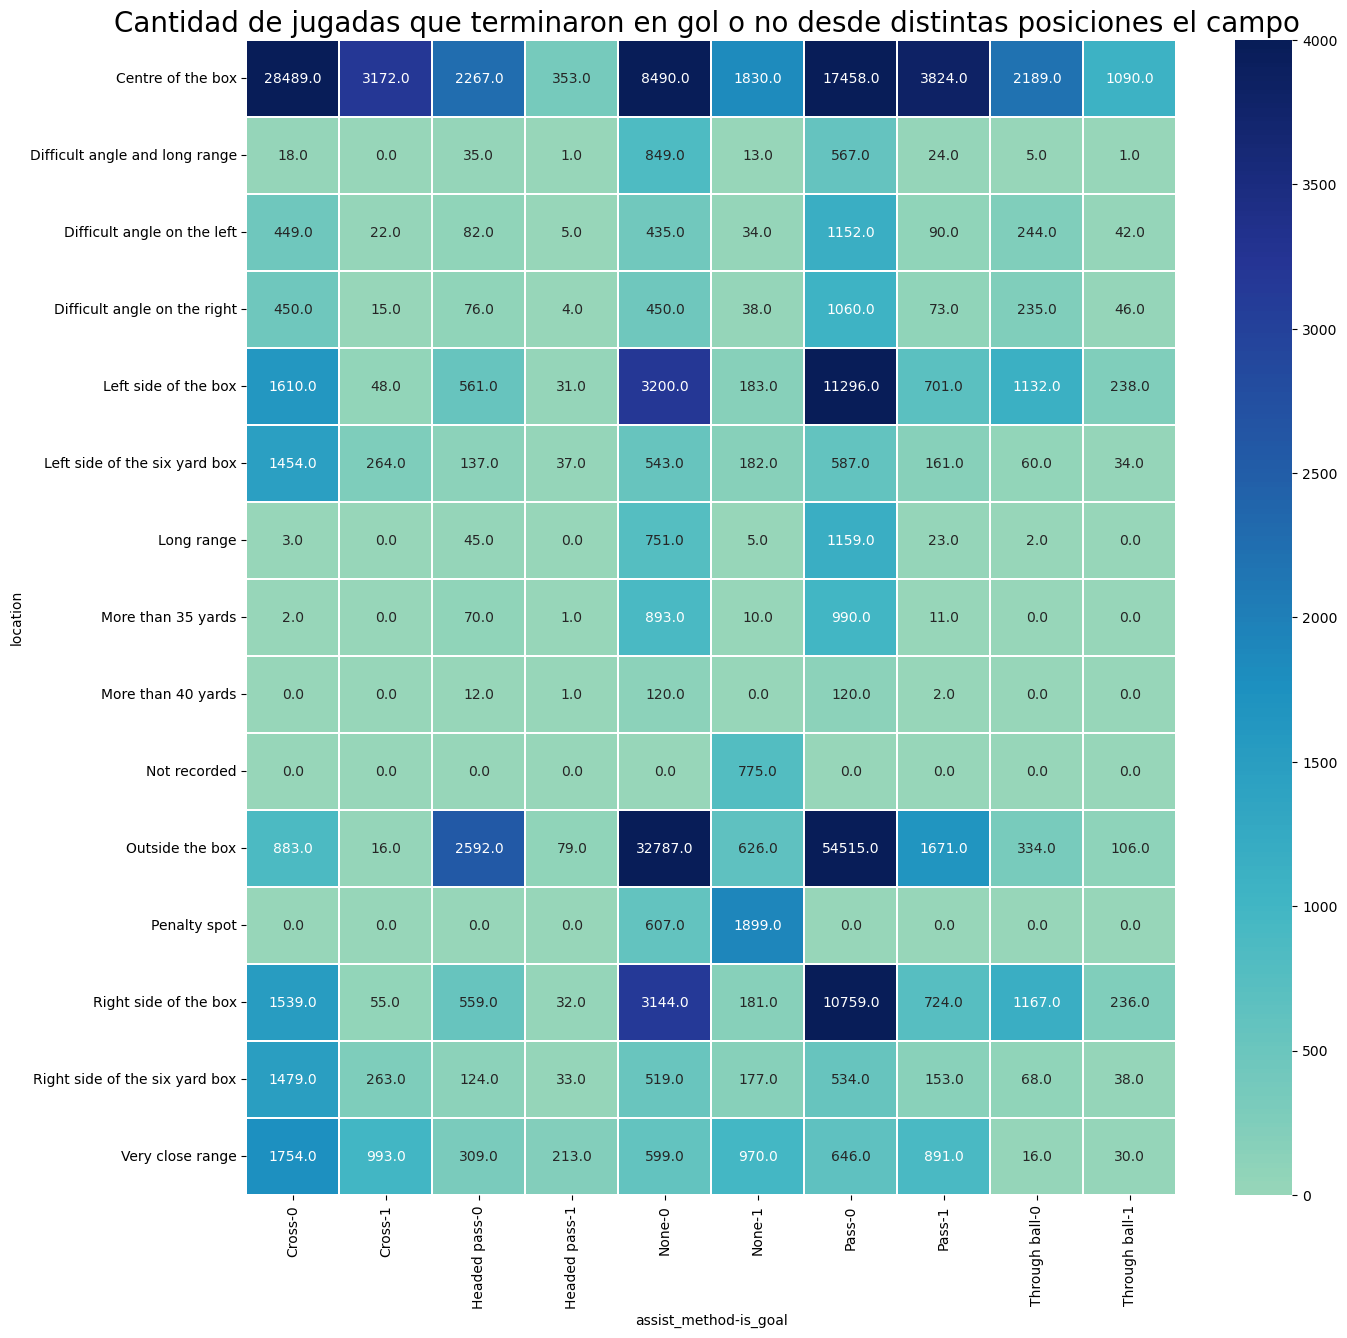

In [62]:

#Graficamos los datos en un heatmap para observar esta comparativa cómo se comporta.
f,ax = plt.subplots(figsize=(15,15))
map1 = sns.heatmap(location_assist_isgoal2,cmap="YlGnBu",vmax=4000, center=1000,
           square=False,linewidths=.10, annot=True, fmt="0",)

plt.title("Cantidad de jugadas que terminaron en gol o no desde distintas posiciones el campo ", fontsize= 20)
plt.show()


<br>

#### En este heatmap podemos observar como la gran mayoría de las jugadas se definen desde el centro del área, independientemente del tipo de asistencia.
#### Tambien hay una gran concentración de jugadas que no vienen precedidas de una pase de un compañero (None), en este tipo de jugadas están considerados los penales, lo cuales se anotan mucho más de los que fallan (1899 vs 607).

### Analizamos las jugadas que terminaron en gol según la parte del cuerpo con la que se remató y desde donde se finalizó la jugada.

<br><br><br>

### Por último analizaremos a lo largo de los minutos en que momento hay más goles según la localía.

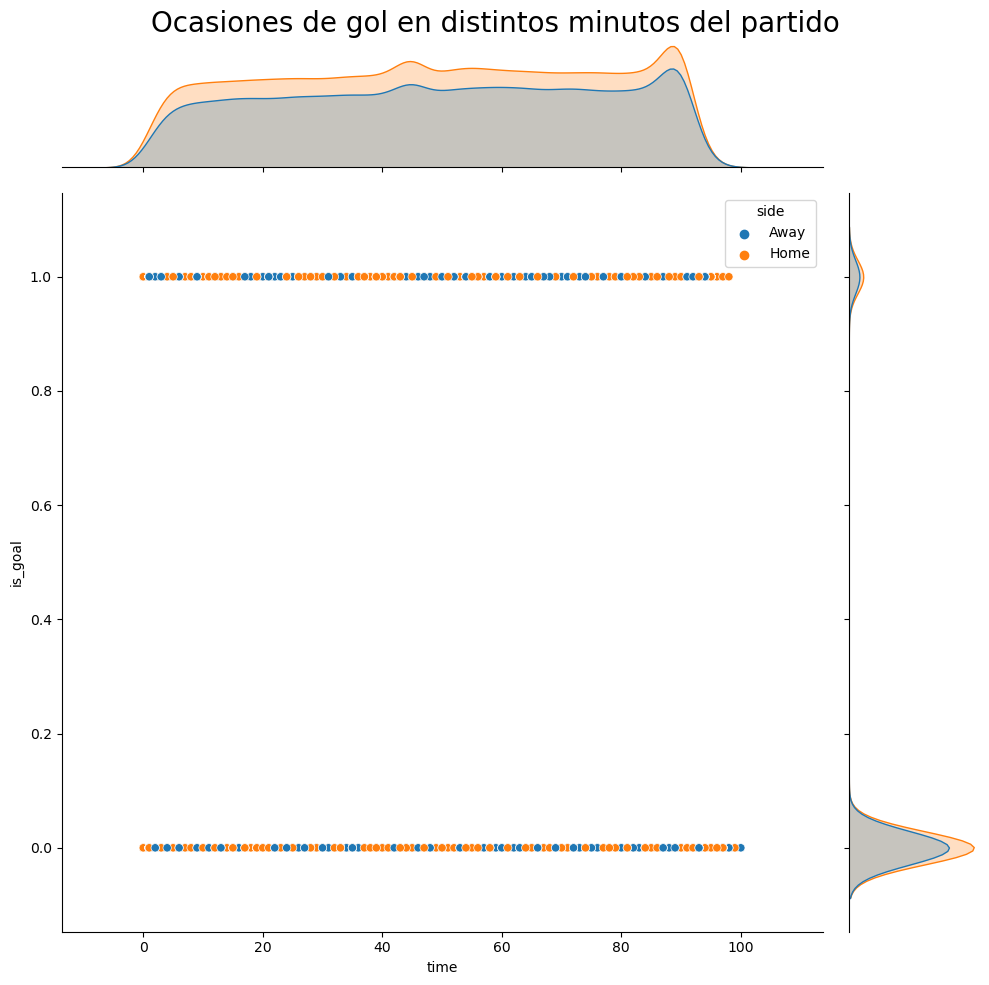

In [63]:

f = sns.jointplot(data=events_clean_1, y="is_goal", x="time", hue="side", height=10)
f.fig.suptitle("Ocasiones de gol en distintos minutos del partido",fontsize=20)


f.fig.subplots_adjust(top=0.95)

plt.show()


<br>

#### En este gráfico de jointplot es claro como a lo largo del encuentro hay muchas más ocasiones que NO terminan en gol en comparación con las que si son gol.
#### Y a pesar de que en otro graficos se observó como el local suele tener más ocasiones por partido, la distribución a lo lardo del encuentro es muy similar tanto para lo locales como para los visitantes.
#### Además, es claro como al final de ambos tiempos (min 45 y min 90) hay más ocasiones de gol, y también se anota con mayor frecuencia, en especial cerca del final.

<br>
<br>
<br>
<br>
<br>
<br>